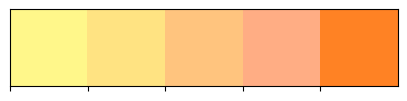

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns
from sklearn.impute import SimpleImputer ## HAndling Missing Values
# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.cluster import (
    KMeans, AgglomerativeClustering, DBSCAN, MeanShift,
    SpectralClustering, AffinityPropagation, OPTICS
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

# set the color palette
palette = sns.color_palette(["#FFF78A",'#FFE382','#FFC47E','#FFAD84','#FF8224'])
sns.palplot(palette) # print color palette

In [4]:
data = pd.read_csv("E:\\projects\\internship_project\\notebooks\\data\\cleaned_data.csv")

In [66]:
data.shape

(2190, 7)

In [3]:
data.head()

,Income,Age,relationship,Education_Level,children,num_purchases,expenses
0,58138.0,67,single,Graduate,0,25,1269
1,46344.0,70,single,Graduate,2,6,18
2,71613.0,59,in_relationship,Graduate,0,21,602
3,26646.0,40,in_relationship,Graduate,1,8,35
4,58293.0,43,in_relationship,Postgraduate,1,19,334


In [5]:
categorical_cols=data.select_dtypes(include='object').columns

numerical_cols=data.select_dtypes(exclude='object').columns

In [6]:
categorical_cols

Index(['relationship', 'Education_Level'], dtype='object')

In [7]:
data['relationship'].value_counts()

relationship
in_relationship    1415
single              775
Name: count, dtype: int64

In [8]:
numerical_cols

Index(['Income', 'Age', 'children', 'num_purchases', 'expenses'], dtype='object')

In [9]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [10]:
nom_cols = ['relationship']
ord_cols = ['Education_Level']

In [11]:
ordinal_pipeline=Pipeline(
    steps=[
        ('ordinalencoder',OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))
    ] 
)

nominal_pipeline=Pipeline(
    steps=[
        ('onehotencoder',OneHotEncoder(categories=[['in_relationship', 'single']]))
    ] 
)



In [12]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('ordinal_pipeline',ordinal_pipeline,ord_cols),
        ('nominal_pipeline',nominal_pipeline,nom_cols)
    ]
)

In [76]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Income', 'Age', 'members_home', 'num_purchases', 'expenses'], dtype='object')),
                                ('ordinal_pipeline',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal_pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(categories=[['in_relationship',
                                                                             'single']]))]),
                                 ['relationship'])])

In [77]:
data.shape

(2190, 7)

In [14]:
# Now lets fit and transform the data
preprocessed_data= preprocessor.fit_transform(data)

In [15]:
preprocessed_data[0]

array([ 0.31920779,  1.04631104, -1.2779601 ,  1.33284025,  1.49312876,
        1.        ,  0.        ,  1.        ])

In [16]:
preprocessed_data.shape

(2190, 8)

## K-Means clustering 

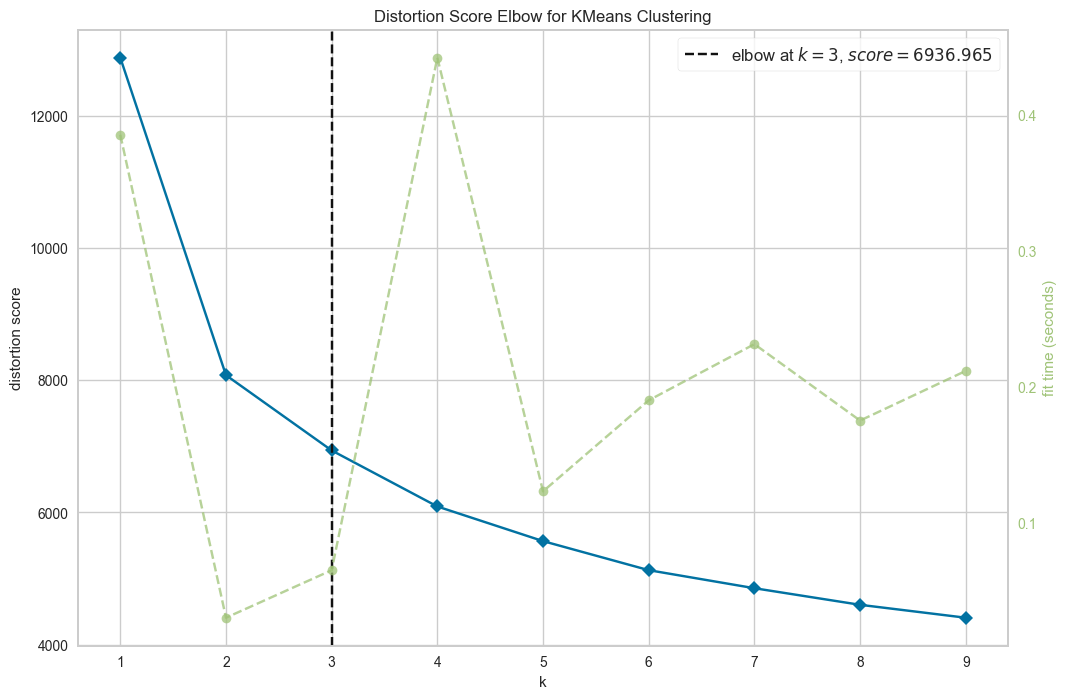

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=(1,10))
elbow_graph.fit(preprocessed_data)
elbow_graph.show()

In [18]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=3, random_state=42)
 #fit the data and adding back clusters to the data in clusters column

In [19]:
from sklearn.metrics import silhouette_score
kmeans_labels = kmeans.fit_predict(preprocessed_data)
kmeans_score = silhouette_score(preprocessed_data, kmeans_labels)
print(kmeans_score)

0.24443574527387624


In [20]:
## with PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(preprocessed_data)
PCA_ds = pd.DataFrame(pca.transform(preprocessed_data))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2190.0,1.622244e-17,1.662726e+00,-2.867635e+00,-1.591214e+00,-2.063710e-01,1.467119e+00,4.276233e+00
1,2190.0,-2.271141e-17,1.069359e+00,-3.009770e+00,-7.370492e-01,8.529753e-03,7.864362e-01,3.421856e+00
2,2190.0,-9.327901e-17,8.175136e-01,-2.841267e+00,-4.993347e-01,3.807960e-02,5.390205e-01,2.930468e+00
3,2190.0,-3.082263e-17,6.762564e-01,-8.904661e-01,-5.256371e-01,-3.837939e-01,8.358625e-01,1.184264e+00
4,2190.0,2.595590e-17,6.342139e-01,-1.328289e+00,-5.368067e-01,4.150805e-02,3.972727e-01,1.972058e+00
5,2190.0,1.703356e-17,5.317623e-01,-1.984382e+00,-3.470239e-01,-1.370251e-02,3.486303e-01,3.535308e+00
6,2190.0,4.136721e-17,4.063530e-01,-2.264155e+00,-2.287493e-01,1.059638e-02,2.431016e-01,2.832729e+00
7,2190.0,-4.125105e-19,2.701933e-15,-5.907914e-15,-3.021334e-15,1.253024e-15,2.141203e-15,3.584493e-15


In [21]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.46986354, 0.66421044, 0.77779524, 0.85551887, 0.92387883,
       0.97193679, 1.        , 1.        ])

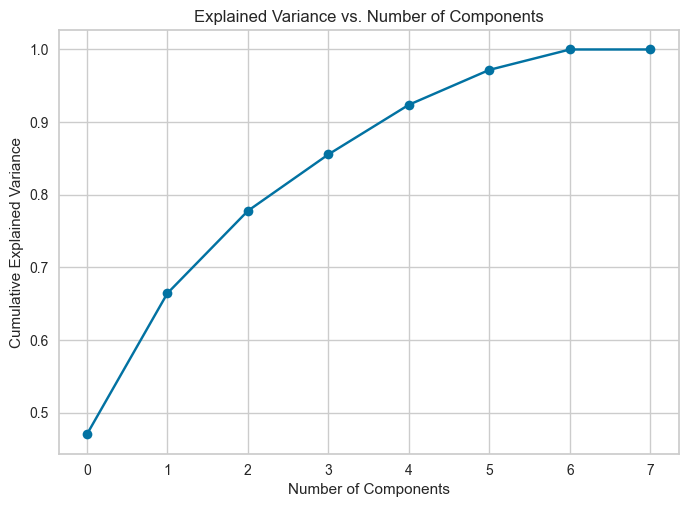

In [22]:
# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [29]:
pca = PCA(n_components=4)
pca.fit(preprocessed_data)
PCA_ds = pd.DataFrame(pca.transform(preprocessed_data))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2190.0,6.975648e-17,1.662726,-2.867635,-1.591214,-0.206371,1.467119,4.276233
1,2190.0,-1.946692e-17,1.069359,-3.009770,-0.737049,0.008530,0.786436,3.421856
2,2190.0,-6.164526e-17,0.817514,-2.841267,-0.499335,0.038080,0.539021,2.930468
3,2190.0,-2.108917e-17,0.676256,-0.890466,-0.525637,-0.383794,0.835862,1.184264


In [30]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.46986354, 0.66421044, 0.77779524, 0.85551887])

In [31]:
PCA_ds.head()

,0,1,2,3
0,2.240664,0.117541,-0.935357,0.720557
1,-1.527332,1.655717,-0.335792,0.919919
2,1.496040,-0.309769,-0.650115,-0.629483
3,-1.828182,-1.158290,0.241585,-0.500010
4,0.162041,-0.530760,0.897843,-0.354207


Elbow Method to determine the number of clusters to be formed:


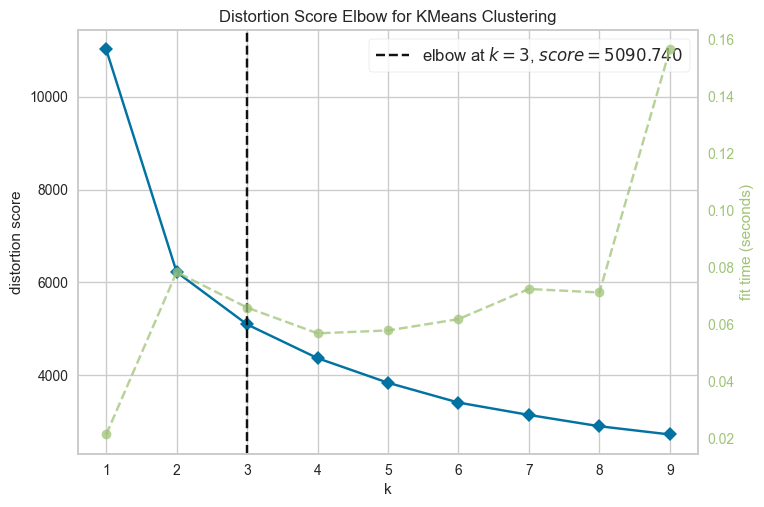

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=(1,10))
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [33]:
# Note: K-Means is a popular centroid-based clustering algorithm.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_ds)
kmeans_score = silhouette_score(PCA_ds, kmeans_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Ward linkage.
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(PCA_ds)
agglomerative_score = silhouette_score(PCA_ds, agglomerative_labels)

# Note: DBSCAN is a density-based clustering algorithm.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(PCA_ds)
dbscan_score = silhouette_score(PCA_ds, dbscan_labels)

# Note: GMM is a probabilistic model-based clustering algorithm.
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(PCA_ds)
gmm_score = silhouette_score(PCA_ds, gmm_labels)




In [34]:
print("K-Means Silhouette Score:", kmeans_score)
print("Agglomerative Silhouette Score:", agglomerative_score)
print("DBSCAN Silhouette Score:", dbscan_score)
print("GMM Silhouette Score:", gmm_score)

K-Means Silhouette Score: 0.3014753014164772
Agglomerative Silhouette Score: 0.2718933485470945
DBSCAN Silhouette Score: -0.06934594600720789
GMM Silhouette Score: 0.22222316491158206


In [35]:
## choosing kmeans clustering with PCA as the final model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_ds)
data['Clusters'] = kmeans.fit_predict(PCA_ds)
kmeans_score = silhouette_score(PCA_ds, kmeans_labels)
print(kmeans_score)

0.3014753014164772


In [36]:
data['Clusters'].value_counts()

Clusters
1    892
0    691
2    607
Name: count, dtype: int64

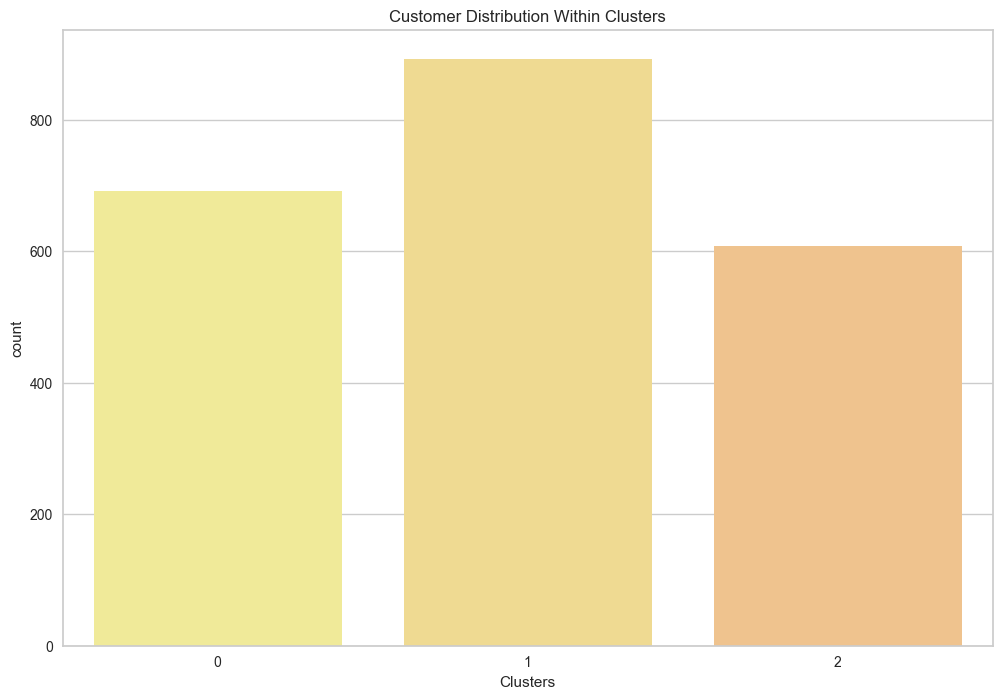

In [37]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=data, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()

### observations
 cluster 1 has highest number of customers
 

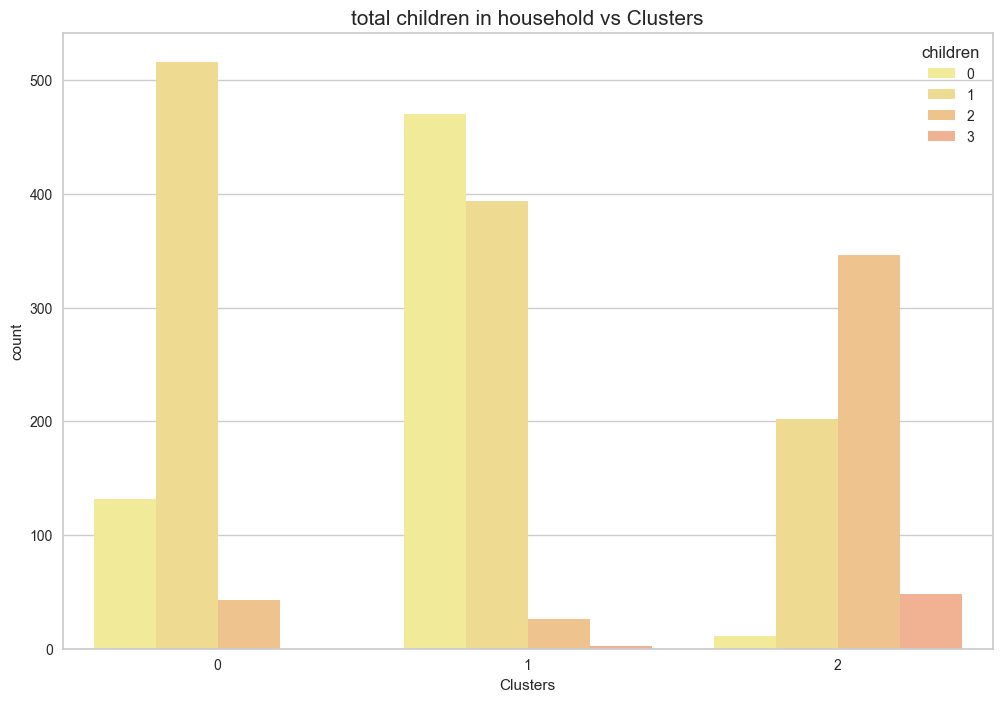

In [38]:
# Find out the customers which have kids in different clusters
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x="Clusters", hue="children",palette=palette)
plt.title("total children in household vs Clusters", size=15)
plt.show()

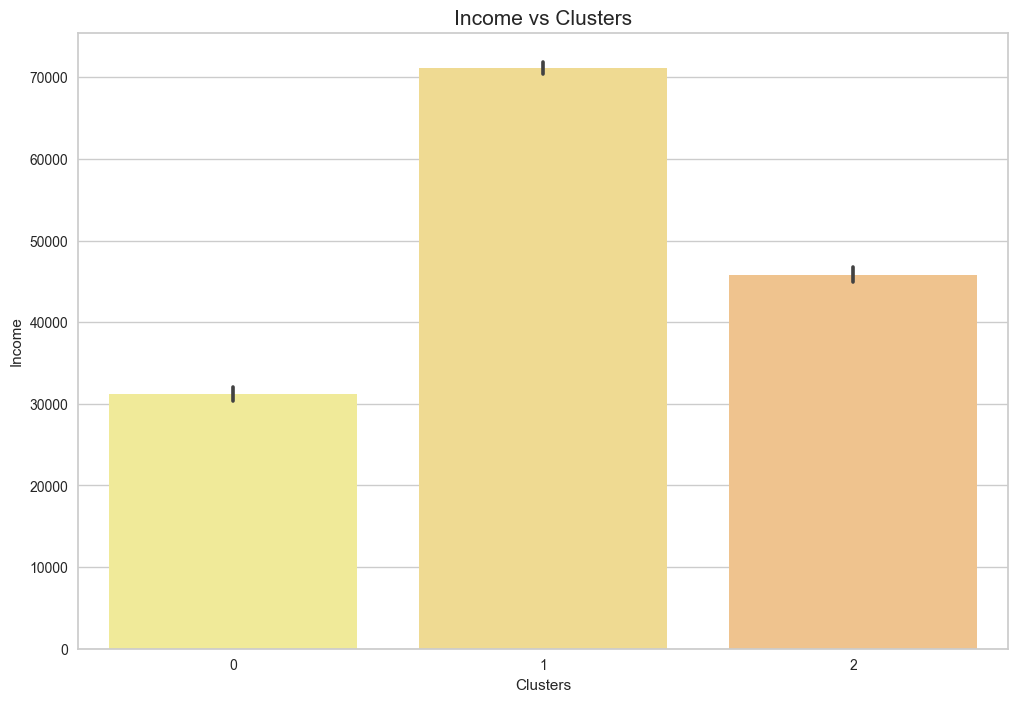

In [39]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data["Clusters"], y=data["Income"],palette=palette)
plt.title("Income vs Clusters", size=15)
plt.show()

### OBSERVATIONS

   clusters  1 have the most income generating customers
-- cluster 0 has less income generating individuals

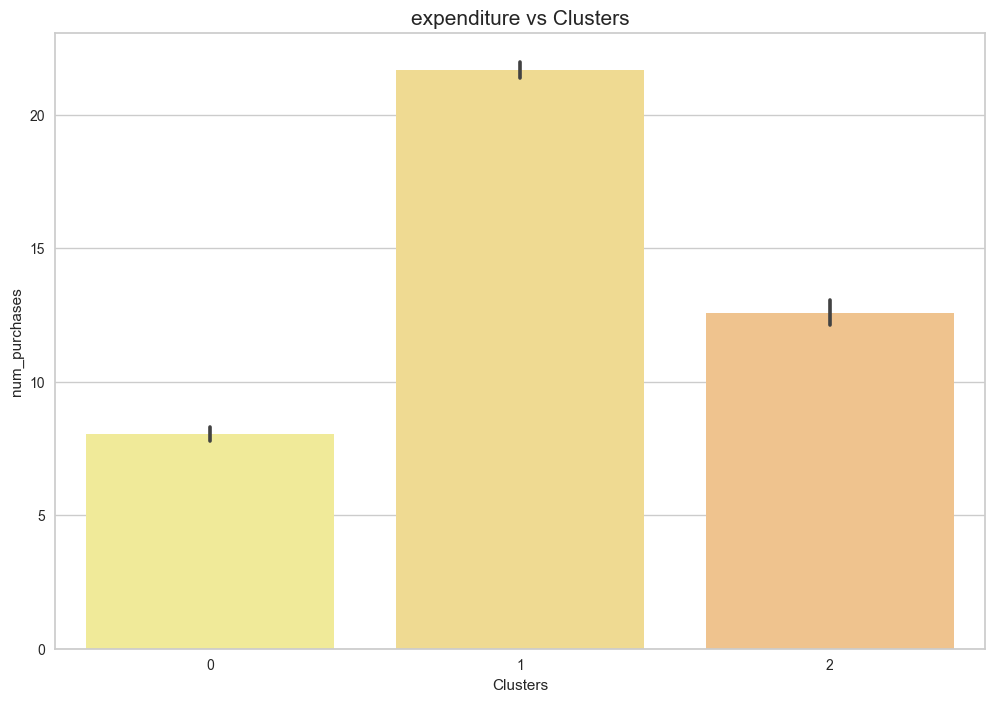

In [40]:
# Lets findout expenditure of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data["Clusters"], y=data["num_purchases"],palette=palette)
plt.title("expenditure vs Clusters", size=15)
plt.show()

-- clusters 1 have the most purchases done

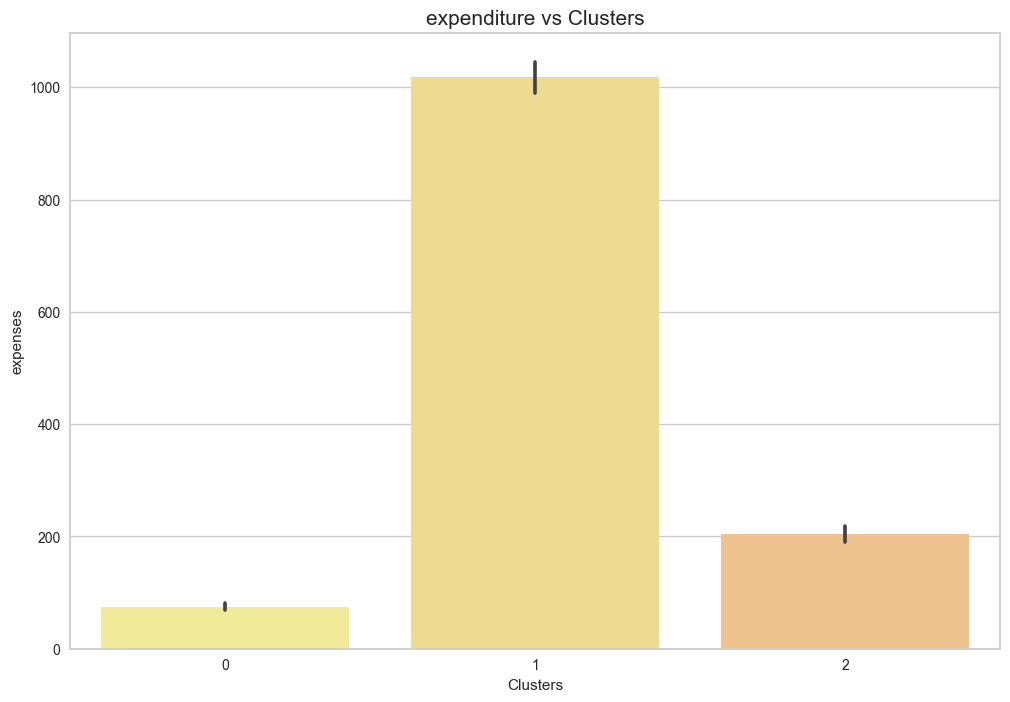

In [41]:
# Lets findout expenditure of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=data["Clusters"], y=data["expenses"],palette=palette)
plt.title("expenditure vs Clusters", size=15)
plt.show()

clustor 1 has most expenditure

<Axes: xlabel='Clusters', ylabel='count'>

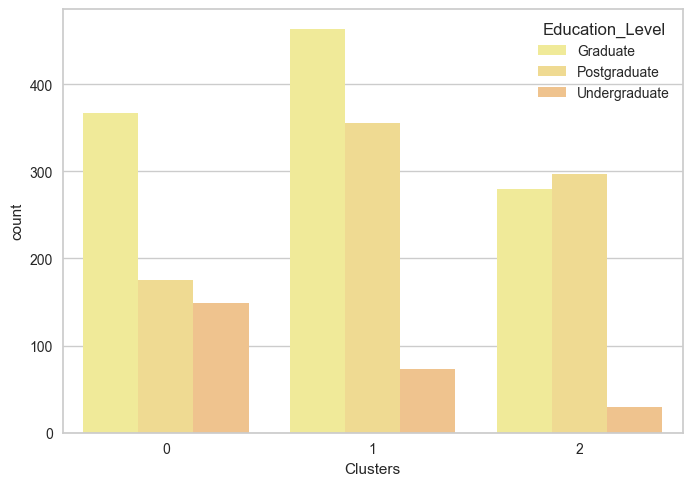

In [42]:
sns.countplot(data=data, x="Clusters", hue="Education_Level",palette=palette)

-- cluster 1 has the most number of graduates , post graduates . 
at  the same time income of cluster 1 is also compared to other 2 clusters.
-- cluster 0 has significant number of graduates and post graduates but theier income is less than other 2 clusters

<Axes: xlabel='Clusters', ylabel='count'>

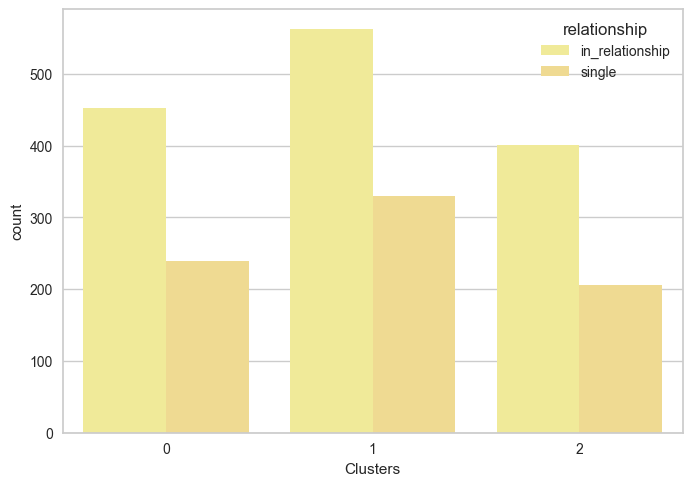

In [43]:
sns.countplot(data=data, x="Clusters", hue="relationship",palette=palette)

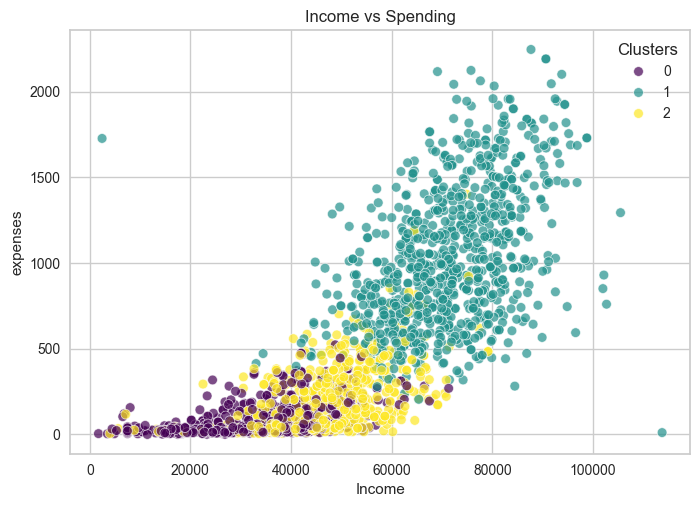

In [45]:
sns.scatterplot(
    data=data,
    x="Income",
    y="expenses",
    hue="Clusters",
    palette="viridis",
    alpha=0.7,
)
plt.title("Income vs Spending")
plt.show()

## Customer Profiling

### Cluster 0 
1. less number of customers with low income
2. almost equal number of graduates and postgraduates
3. most of them are in relationship. few are singles
4. have 1 or 2 kids
5. their spending is lowest 


### Cluster 1
1. maximum number of customers with highest income
2. Graduates and post graduates
3. maximum number of people are  in relationship and few are single people
4. no kids, only few have 1 kid
5. their spending is also high



### Cluster 2
1. Average number of customers with middle income
2. almost equal number of graduates and post graduates
3. most of them are in relationship
4. have 1 or 2 kids. only this group have 3 kids
5. their spending is the less

In [110]:
data.columns

Index(['Income', 'Age', 'relationship', 'Education_Level', 'members_home',
       'num_purchases', 'expenses', 'Clusters'],
      dtype='object')

In [2]:
data.sample()

NameError: name 'data' is not defined

-- cluster 2 has most individuals who are in relationship as well as singles

In [51]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
# separate features and target column
X = data.drop('Clusters', axis=1)
y = data['Clusters']

In [92]:
X.shape

(2216, 9)

In [93]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [94]:
x_train.shape

(1551, 9)

In [95]:
x_train= preprocessor.fit_transform(x_train)
x_test= preprocessor.transform(x_test)

In [96]:

classfiier =  GradientBoostingClassifier(n_estimators=100,learning_rate=0.1).fit(x_train,y_train)

In [105]:
y_predict = classfiier.predict(x_test)

In [97]:
classfiier.score(x_test,y_test)

0.9774436090225563

In [98]:
import pickle

filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(classfiier, open(filename,'wb')) 

In [85]:
data['expenses'].min()

0

In [103]:
# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('classifier.pkl','rb'))

classifier.n_features_in_



    

10

In [106]:
filename1 = 'processor.pkl' # create a variable with name you wanna give to the file
pickle.dump(preprocessor, open(filename1,'wb')) 

In [44]:
data[numerical_cols].corr()

,Income,Response,Age,members_home,AcceptedCmp,num_purchases,expenses
Income,1.000000,0.133047,0.161791,-0.240148,0.179759,0.566873,0.658654
Response,0.133047,1.000000,-0.023692,-0.217987,0.387126,0.154237,0.270928
Age,0.161791,-0.023692,1.000000,0.071207,-0.031711,0.170055,0.118995
members_home,-0.240148,-0.217987,0.071207,1.000000,-0.144053,-0.203621,-0.402534
AcceptedCmp,0.179759,0.387126,-0.031711,-0.144053,1.000000,0.165206,0.298739
num_purchases,0.566873,0.154237,0.170055,-0.203621,0.165206,1.000000,0.739371
expenses,0.658654,0.270928,0.118995,-0.402534,0.298739,0.739371,1.000000


In [28]:
target = data['Clusters']

In [29]:
target

0       0
1       1
2       2
3       1
4       2
       ..
2211    2
2212    2
2213    2
2214    2
2215    1
Name: Clusters, Length: 2216, dtype: int32

In [30]:
preprocessed_data

array([[ 0.2340627 ,  2.37795178,  0.98644293, ...,  1.        ,
         0.        ,  1.        ],
       [-0.23455948, -0.42052997,  1.23680074, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.76947764, -0.42052997,  0.31882209, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.18809052, -0.42052997, -1.01641959, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.67538765, -0.42052997,  1.06989553, ...,  2.        ,
         1.        ,  0.        ],
       [ 0.02470453,  2.37795178,  1.23680074, ...,  2.        ,
         1.        ,  0.        ]])

In [31]:
 data_array = np.c_[preprocessed_data, np.array(target)]

In [44]:
preprocessed_data.shape

(2216, 10)

In [84]:
data_array.shape

(2216, 11)

In [33]:
X,y = (data_array[:,:-1],data_array[:,-1])

In [43]:
X.shape

(2216, 10)

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [40]:
x_train.shape

(1662, 10)

In [41]:
y_train.shape

(1662,)

In [42]:
x_test.shape

(554, 10)

In [74]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
classfiier =  GradientBoostingClassifier(n_estimators=100,learning_rate=0.1).fit(x_train,y_train)

In [76]:
y_predict = classfiier.predict(x_test)

In [82]:
classfiier.score(x_test,y_test)

0.98014440433213

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.98014440433213

In [ ]:
data.columns